# Character Set Analysis

In [94]:
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
from matplotlib import cm
from matplotlib.colors import Normalize
import matplotlib.font_manager as fm
import numpy as np

In [102]:
fprop = fm.FontProperties(fname='C:\Windows\Fonts\hpsimplifiedhans-regular.ttf')


In [30]:
DB_NAME = "chardb/chardb.sqlite"

In [31]:
def get_character_font_support_counts():
    """Get the count of fonts that support each character."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Get the count of distinct fonts supporting each character
    cursor.execute(
        """
        SELECT character, COUNT(DISTINCT font)
        FROM font_support
        GROUP BY character
        """
    )

    character_font_counts = cursor.fetchall()
    conn.close()

    return character_font_counts


In [32]:

def plot_histogram(character_font_counts):
    """Plot a 2D histogram of characters with the count of fonts that support them."""
    # Extract characters and their font support counts
    characters = [item[0] for item in character_font_counts]
    font_counts = [item[1] for item in character_font_counts]

    # Set the positions of the bars on the X-axis
    x_positions = np.arange(len(characters))

    # Create the figure and axis
    fig, ax = plt.subplots(figsize=(20, 6))

    # Plot the 2D histogram (bars with heights based on font counts)
    ax.bar(x_positions, font_counts)

    # Set plot labels and title
    ax.set_xlabel('Characters')
    ax.set_ylabel('Number of Fonts Supporting')
    ax.set_title('Character Support by Fonts')

    # Rotate the X-axis labels for better readability
    plt.xticks(rotation=90)

    # Show the plot
    plt.tight_layout()
    plt.show()

In [33]:
character_font_counts = get_character_font_support_counts()

In [34]:
character_font_counts

[('一', 18),
 ('丁', 18),
 ('丂', 1),
 ('七', 18),
 ('丄', 1),
 ('丅', 1),
 ('万', 16),
 ('丈', 17),
 ('三', 18),
 ('上', 18),
 ('下', 18),
 ('丌', 8),
 ('不', 18),
 ('与', 15),
 ('丏', 1),
 ('丐', 14),
 ('丑', 17),
 ('且', 17),
 ('丕', 14),
 ('世', 18),
 ('丘', 17),
 ('丙', 17),
 ('丞', 14),
 ('丟', 14),
 ('並', 18),
 ('丨', 10),
 ('个', 15),
 ('丫', 14),
 ('中', 18),
 ('丮', 1),
 ('丰', 15),
 ('丱', 3),
 ('串', 17),
 ('丳', 1),
 ('丶', 11),
 ('丸', 18),
 ('丹', 17),
 ('主', 18),
 ('丼', 3),
 ('丽', 12),
 ('丿', 11),
 ('乀', 1),
 ('乂', 3),
 ('乃', 17),
 ('久', 18),
 ('乇', 8),
 ('么', 17),
 ('之', 17),
 ('乍', 17),
 ('乎', 17),
 ('乏', 17),
 ('乖', 17),
 ('乘', 17),
 ('乙', 17),
 ('乜', 8),
 ('九', 18),
 ('乞', 17),
 ('也', 17),
 ('乢', 2),
 ('乩', 12),
 ('乱', 15),
 ('乳', 18),
 ('乹', 17),
 ('乾', 18),
 ('乿', 1),
 ('亂', 18),
 ('亃', 1),
 ('亄', 1),
 ('亅', 3),
 ('了', 17),
 ('予', 18),
 ('事', 18),
 ('二', 18),
 ('亍', 8),
 ('于', 17),
 ('亏', 12),
 ('云', 17),
 ('互', 17),
 ('亓', 8),
 ('五', 18),
 ('井', 17),
 ('亘', 12),
 ('亙', 14),
 ('些', 17),
 ('亞', 17),


In [35]:
def sanity_check_font_support(character_font_counts):
    """Sanity check to ensure no character has 0 font support."""
    # List characters with 0 font support
    no_font_support = [character for character, count in character_font_counts if count == 0]

    if no_font_support:
        print(f"Warning: The following characters have no font support: {', '.join(no_font_support)}")
        return False
    else:
        print("Sanity check passed: All characters have at least one font support.")
        return True


In [36]:
sanity_check_font_support(character_font_counts)

Sanity check passed: All characters have at least one font support.


True

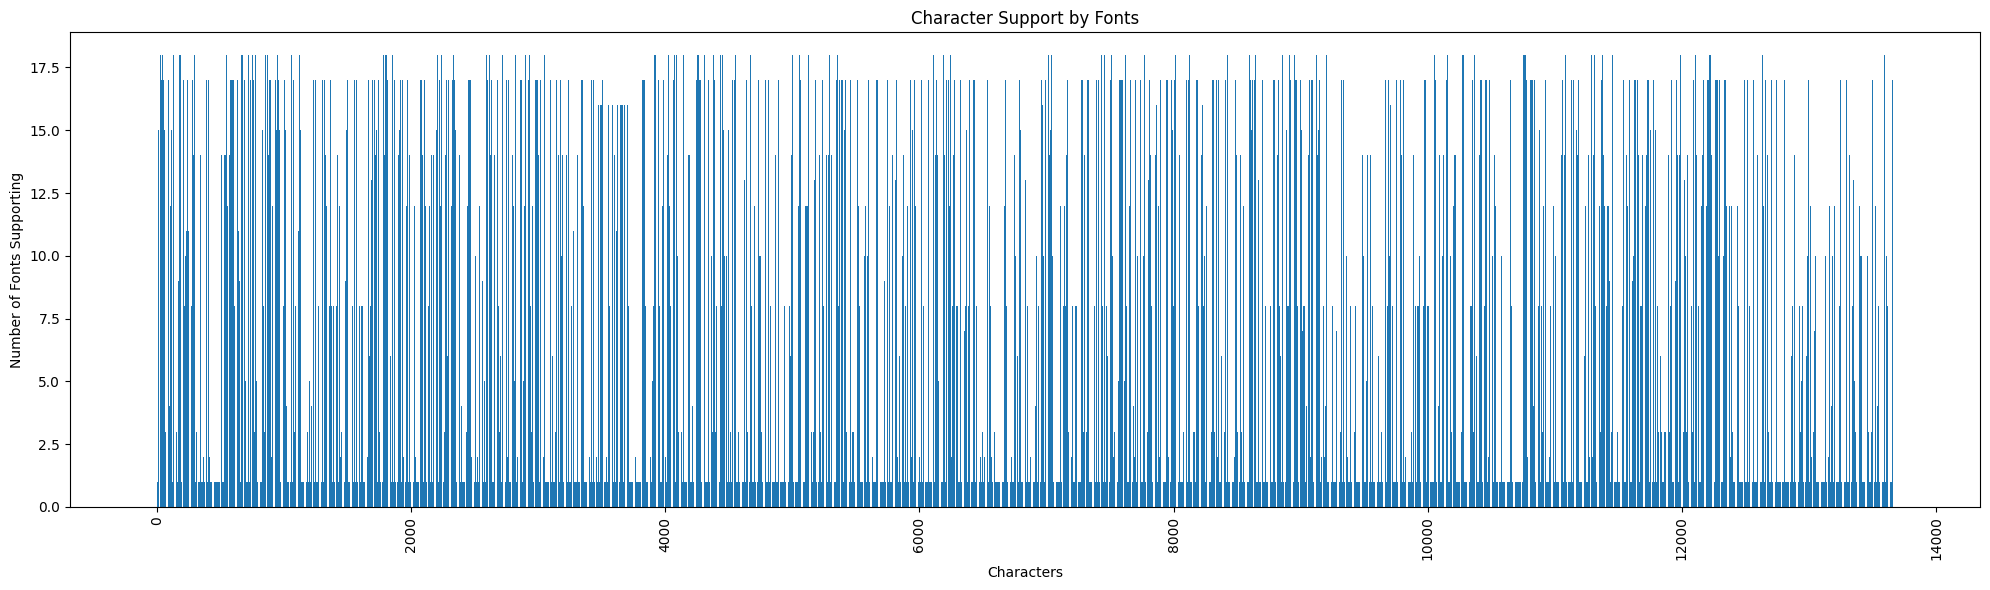

In [37]:
plot_histogram(character_font_counts)

In [38]:
def get_radical_character_counts():
    """Get the count of characters grouped by radical from the database."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Fetch the radical and its associated character count
    cursor.execute(
        """
        SELECT radical, COUNT(character)
        FROM characters
        GROUP BY radical
        """
    )
    radical_counts = cursor.fetchall()
    conn.close()

    return radical_counts

In [40]:
radical_counts = get_radical_character_counts()

In [41]:
radical_counts

[('一', 25),
 ('丨', 9),
 ('丶', 6),
 ('丿', 13),
 ('乙', 15),
 ('亅', 4),
 ('二', 14),
 ('亠', 15),
 ('人', 438),
 ('儿', 23),
 ('入', 5),
 ('八', 12),
 ('冂', 11),
 ('冖', 10),
 ('冫', 32),
 ('几', 8),
 ('凵', 7),
 ('刀', 104),
 ('力', 55),
 ('勹', 17),
 ('匕', 4),
 ('匚', 19),
 ('匸', 8),
 ('十', 16),
 ('卜', 8),
 ('卩', 17),
 ('厂', 30),
 ('厶', 5),
 ('又', 17),
 ('口', 484),
 ('囗', 47),
 ('土', 284),
 ('士', 14),
 ('夂', 2),
 ('夊', 7),
 ('夕', 12),
 ('大', 48),
 ('女', 323),
 ('子', 32),
 ('宀', 86),
 ('寸', 14),
 ('小', 11),
 ('尢', 9),
 ('尸', 42),
 ('屮', 2),
 ('山', 226),
 ('巛', 7),
 ('工', 7),
 ('己', 7),
 ('巾', 79),
 ('干', 6),
 ('幺', 5),
 ('广', 87),
 ('廴', 5),
 ('廾', 10),
 ('弋', 5),
 ('弓', 42),
 ('彐', 7),
 ('彡', 14),
 ('彳', 56),
 ('心', 414),
 ('戈', 34),
 ('户', 16),
 ('手', 520),
 ('支', 3),
 ('攴', 52),
 ('文', 9),
 ('斗', 10),
 ('斤', 15),
 ('方', 26),
 ('无', 3),
 ('日', 184),
 ('曰', 16),
 ('月', 28),
 ('木', 690),
 ('欠', 50),
 ('止', 11),
 ('歹', 40),
 ('殳', 17),
 ('毋', 7),
 ('比', 5),
 ('毛', 37),
 ('氏', 4),
 ('气', 5),
 ('水', 792)

In [42]:
def sanity_check_radical_counts():
    """Check if the sum of all radical counts equals the total number of characters."""
    conn = sqlite3.connect(DB_NAME)
    cursor = conn.cursor()

    # Sum of all character counts grouped by radical
    cursor.execute(
        """
        SELECT SUM(count)
        FROM (
            SELECT COUNT(character) AS count
            FROM characters
            GROUP BY radical
        )
        """
    )
    radical_total = cursor.fetchone()[0]

    # Total number of characters in the Characters table
    cursor.execute("SELECT COUNT(character) FROM characters")
    character_total = cursor.fetchone()[0]

    conn.close()

    # Compare totals
    if radical_total == character_total:
        print(f"Sanity check passed: Total radicals count ({radical_total}) matches total characters ({character_total}).")
        return True
    else:
        print(f"Sanity check failed: Total radicals count ({radical_total}) does not match total characters ({character_total}).")
        return False


In [43]:
sanity_check_radical_counts()

Sanity check passed: Total radicals count (13664) matches total characters (13664).


True

In [117]:
def plot_3d_radical_histogram(radical_counts):

    sorted_counts = sorted(radical_counts, key=lambda x: x[1], reverse=False)

    radicals, counts = zip(*sorted_counts)

    num_radicals = len(radicals)

    grid_size = int(np.ceil(np.sqrt(num_radicals)))

    x_coords, y_coords = np.meshgrid(range(grid_size), range(grid_size))

    x_coords = x_coords.flatten()[:num_radicals]

    y_coords = y_coords.flatten()[:num_radicals]

    norm = Normalize(vmin=min(counts), vmax=max(counts))
    cmap = cm.viridis
    colors = [cmap(norm(count)) for count in counts]

    fig = plt.figure(figsize=(20, 18))

    ax = fig.add_subplot(111, projection='3d')

    bar_width = 0.5

    # Create bars with sorted data, but invert the z-axis height by subtracting from the max count
    ax.bar3d(x_coords, y_coords, np.zeros_like(counts), bar_width, bar_width, counts, color=colors, shade=True)

    for x, y, count, rad in zip(x_coords, y_coords, counts, radicals):

        ax.text(x, y, count + 1, rad, ha='center', va='bottom', fontsize=14, fontweight='bold', fontproperties=fprop)

    ax.set_xlabel('X')

    ax.set_ylabel('Y')

    ax.set_zlabel('Count')

    ax.set_title('Radicals count distribution')

    ax.set_xticks(range(grid_size))

    ax.set_yticks(range(grid_size))

    ax.set_zlim(0, max(counts) + 5)

    plt.show()

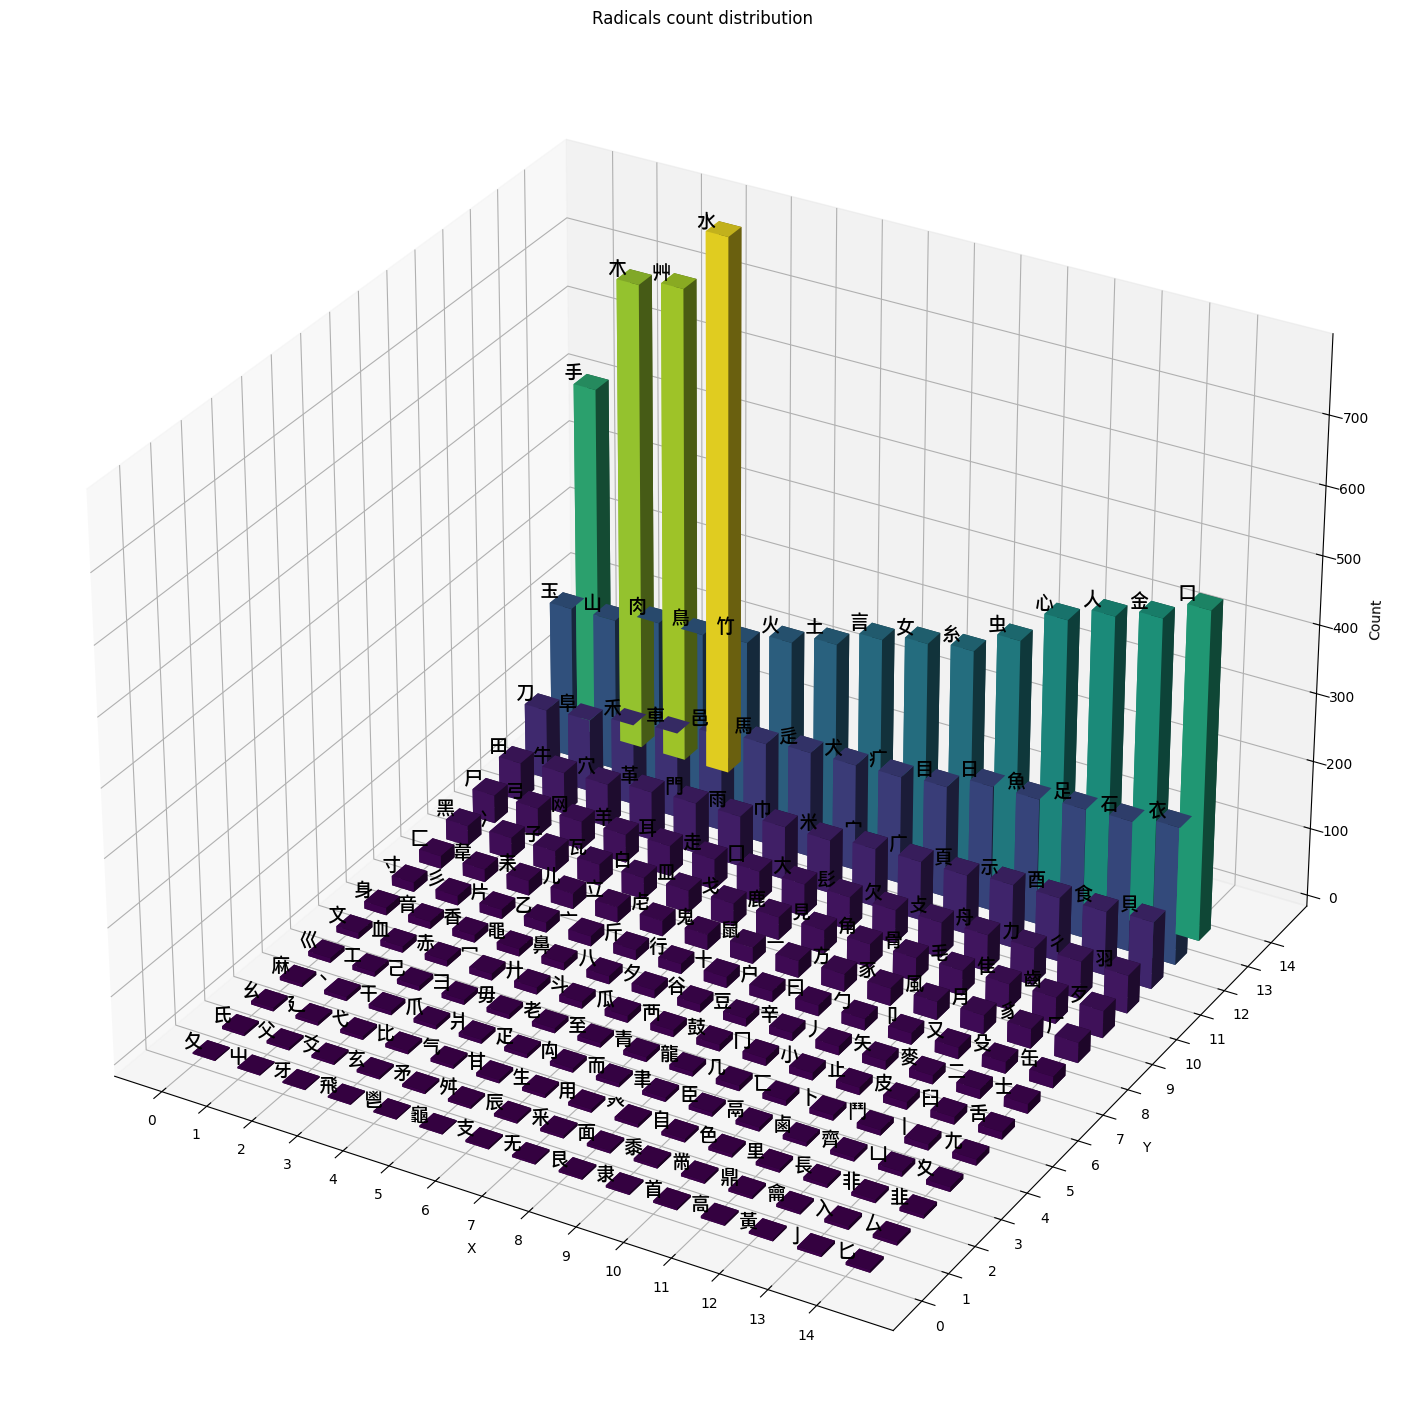

In [123]:
 plot_3d_radical_histogram(radical_counts)